<!-- Importing Libraries -->

# Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

import numpy as np 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [3]:
date = pd.read_csv(r"E:\Solution Challenge\Cafe\Cafe+-+DateInfo.csv")
transaction = pd.read_csv(r"E:\Solution Challenge\Cafe\Cafe+-+Transaction+-+Store.csv")

# Filtering Data

In [4]:
transaction = transaction[transaction["SELL_ID"] == 1070]

In [5]:
transaction['YEAR'] = pd.DatetimeIndex(transaction['CALENDAR_DATE']).year
transaction['DATE'] = pd.DatetimeIndex(transaction['CALENDAR_DATE']).day

In [6]:
transaction = transaction[transaction["YEAR"] == 2012]

In [7]:
transaction = transaction.reset_index(drop = True)

In [8]:
transaction = transaction.drop(['PRICE', 'SELL_CATEGORY'], axis = 1)


In [9]:
date = date[date["YEAR"] == 2012]

In [10]:
date = date.drop(['CALENDAR_DATE', 'YEAR','IS_SCHOOLBREAK'], axis = 1)

# Merging Datasets

In [11]:
transaction['HOLIDAY'] = date['HOLIDAY']
transaction['IS_WEEKEND'] = date['IS_WEEKEND']
transaction['IS_OUTDOOR'] = date['IS_OUTDOOR']
transaction['AVERAGE_TEMPERATURE'] = date['AVERAGE_TEMPERATURE']

In [12]:
transaction.head()

,CALENDAR_DATE,QUANTITY,SELL_ID,YEAR,DATE,HOLIDAY,IS_WEEKEND,IS_OUTDOOR,AVERAGE_TEMPERATURE
0,01/01/12,46,1070,2012,1,New Year,1,0,24.8
1,01/02/12,70,1070,2012,2,New Year,0,0,24.8
2,01/03/12,62,1070,2012,3,New Year,0,1,32.0
3,01/04/12,88,1070,2012,4,NaN,0,1,32.0
4,01/05/12,104,1070,2012,5,NaN,0,0,24.8


In [13]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CALENDAR_DATE        365 non-null    object 
 1   QUANTITY             365 non-null    int64  
 2   SELL_ID              365 non-null    int64  
 3   YEAR                 365 non-null    int64  
 4   DATE                 365 non-null    int64  
 5   HOLIDAY              29 non-null     object 
 6   IS_WEEKEND           365 non-null    int64  
 7   IS_OUTDOOR           365 non-null    int64  
 8   AVERAGE_TEMPERATURE  365 non-null    float64
dtypes: float64(1), int64(6), object(2)
memory usage: 25.8+ KB


In [14]:
def bar_plot(variable):
    # get feature
    var = transaction[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

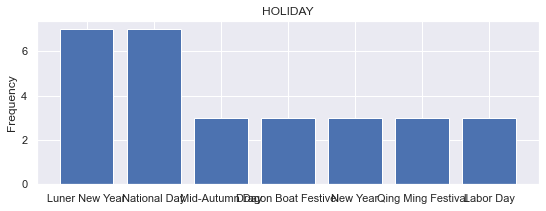

HOLIDAY:
Luner New Year          7
National Day            7
Mid-Autumn Day          3
Dragon Boat Festivel    3
New Year                3
Qing Ming Festival      3
Labor Day               3
Name: HOLIDAY, dtype: int64


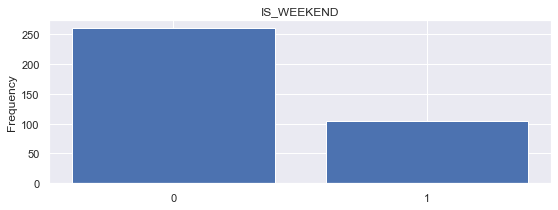

IS_WEEKEND:
0    260
1    105
Name: IS_WEEKEND, dtype: int64


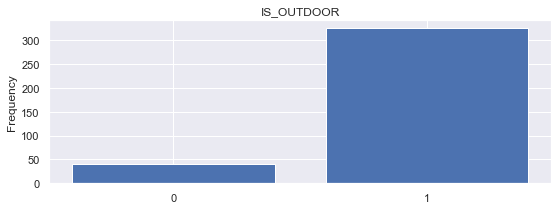

IS_OUTDOOR:
1    325
0     40
Name: IS_OUTDOOR, dtype: int64


In [15]:
sns.set_style('darkgrid')
categorical_variables = ['HOLIDAY','IS_WEEKEND','IS_OUTDOOR']
for c in categorical_variables:
    bar_plot(c)

In [16]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(transaction[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

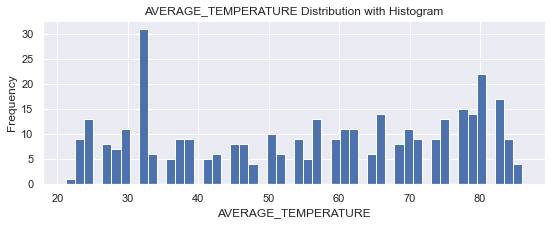

In [17]:
numerical_variables = ['AVERAGE_TEMPERATURE']
for n in numerical_variables:
    plot_hist(n)

In [18]:
transaction.dtypes

CALENDAR_DATE           object
QUANTITY                 int64
SELL_ID                  int64
YEAR                     int64
DATE                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_OUTDOOR               int64
AVERAGE_TEMPERATURE    float64
dtype: object

# Basic Data Analysis

In [19]:
# Average(mean) quantity rate by holiday

In [20]:
transaction[["HOLIDAY","QUANTITY"]].groupby(["HOLIDAY"], as_index = False).mean().sort_values(by="QUANTITY",ascending = False)

,HOLIDAY,QUANTITY
1,Labor Day,63.333333
3,Mid-Autumn Day,61.333333
6,Qing Ming Festival,61.333333
0,Dragon Boat Festivel,60.666667
5,New Year,59.333333
4,National Day,56.571429
2,Luner New Year,54.000000


In [21]:
# Just checking occurence using pie graphs

In [22]:
from plotly.offline import iplot
df = transaction

labels = transaction["HOLIDAY"].value_counts().index
pie1 = transaction['HOLIDAY'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Distribution based on Holidays",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Is_Holiday",
                "x": 1,
                "y": 1,
            },
        ]
    }
}
iplot(fig)

In [23]:
transaction[["IS_WEEKEND","QUANTITY"]].groupby(["IS_WEEKEND"], as_index = False).mean().sort_values(by="QUANTITY",ascending = False)

,IS_WEEKEND,QUANTITY
0,0,88.015385
1,1,62.209524


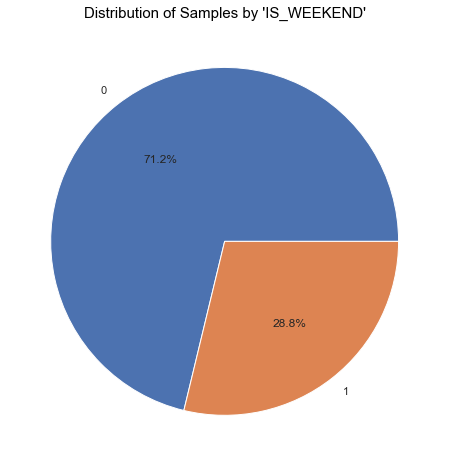

In [24]:
labels = transaction['IS_WEEKEND'].value_counts().index
sizes = transaction['IS_WEEKEND'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'IS_WEEKEND'",color = 'black',fontsize = 15);

In [25]:
transaction[["IS_OUTDOOR","QUANTITY"]].groupby(["IS_OUTDOOR"], as_index = False).mean().sort_values(by="QUANTITY",ascending = False)

,IS_OUTDOOR,QUANTITY
0,0,93.450000
1,1,79.009231


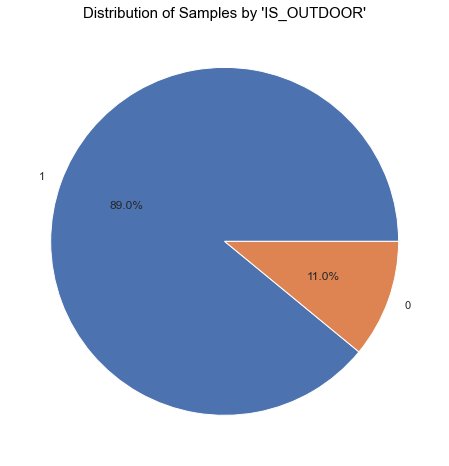

In [26]:
labels = transaction['IS_OUTDOOR'].value_counts().index
sizes = transaction['IS_OUTDOOR'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'IS_OUTDOOR'",color = 'black',fontsize = 15);

In [27]:
transaction[["AVERAGE_TEMPERATURE","QUANTITY"]].groupby(["AVERAGE_TEMPERATURE"], as_index = False).mean().sort_values(by="QUANTITY",ascending = False)

,AVERAGE_TEMPERATURE,QUANTITY
0,21.2,104.000000
1,23.0,97.333333
5,30.2,94.545455
36,86.0,91.000000
4,28.4,90.000000
10,39.2,87.555556
2,24.8,85.538462
14,46.4,84.500000
31,77.0,84.400000
28,71.6,83.777778


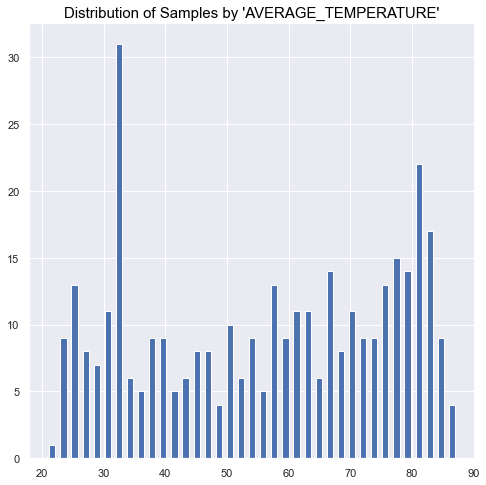

In [28]:
labels = transaction['AVERAGE_TEMPERATURE'].value_counts().index
sizes = transaction['AVERAGE_TEMPERATURE'].value_counts().values

plt.figure(figsize = (8,8))
plt.bar(labels, height=sizes,  align='edge', width=1)
plt.title("Distribution of Samples by 'AVERAGE_TEMPERATURE'",color = 'black',fontsize = 15);

# Pandas Profiling

In [29]:
# import pandas_profiling as pp
# pp.ProfileReport(transaction)

# Missing Values

In [30]:
transaction[transaction['HOLIDAY'].isnull()]

,CALENDAR_DATE,QUANTITY,SELL_ID,YEAR,DATE,HOLIDAY,IS_WEEKEND,IS_OUTDOOR,AVERAGE_TEMPERATURE
3,01/04/12,88,1070,2012,4,NaN,0,1,32.0
4,01/05/12,104,1070,2012,5,NaN,0,0,24.8
5,01/06/12,100,1070,2012,6,NaN,0,0,23.0
6,01/07/12,70,1070,2012,7,NaN,1,0,26.6
7,01/08/12,70,1070,2012,8,NaN,1,0,26.6
...,...,...,...,...,...,...,...,...,...
360,12/27/12,88,1070,2012,27,NaN,0,1,30.2
361,12/28/12,108,1070,2012,28,NaN,0,0,30.2
362,12/29/12,58,1070,2012,29,NaN,1,1,26.6
363,12/30/12,62,1070,2012,30,NaN,1,1,28.4


In [31]:
transaction['HOLIDAY'] = transaction['HOLIDAY'].fillna(0)

# Encoding

In [32]:
print("Unique Values for HOLIDAY", transaction['HOLIDAY'].unique())
print("Unique Values for IS_WEEKEND", transaction['IS_WEEKEND'].unique())
print("Unique Values for IS_OUTDOOR", transaction['IS_OUTDOOR'].unique())
print("Unique Values for AVERAGE_TEMPERATURE", transaction['AVERAGE_TEMPERATURE'].unique())

Unique Values for HOLIDAY ['New Year' 0 'Luner New Year' 'Qing Ming Festival' 'Labor Day'
 'Dragon Boat Festivel' 'Mid-Autumn Day' 'National Day']
Unique Values for IS_WEEKEND [1 0]
Unique Values for IS_OUTDOOR [0 1]
Unique Values for AVERAGE_TEMPERATURE [24.8 32.  23.  26.6 21.2 28.4 37.4 39.2 42.8 30.2 33.8 35.6 41.  44.6
 46.4 50.  55.4 48.2 51.8 57.2 53.6 60.8 62.6 66.2 69.8 64.4 68.  59.
 71.6 75.2 73.4 80.6 77.  82.4 78.8 84.2 86. ]


In [33]:
transaction = transaction.replace(['New Year', 'Luner New Year', 'Qing Ming Festival', 'Labor Day', 'Dragon Boat Festivel','Mid-Autumn Day', 'National Day'], 1)

In [34]:
transaction

,CALENDAR_DATE,QUANTITY,SELL_ID,YEAR,DATE,HOLIDAY,IS_WEEKEND,IS_OUTDOOR,AVERAGE_TEMPERATURE
0,01/01/12,46,1070,2012,1,1,1,0,24.8
1,01/02/12,70,1070,2012,2,1,0,0,24.8
2,01/03/12,62,1070,2012,3,1,0,1,32.0
3,01/04/12,88,1070,2012,4,0,0,1,32.0
4,01/05/12,104,1070,2012,5,0,0,0,24.8
...,...,...,...,...,...,...,...,...,...
360,12/27/12,88,1070,2012,27,0,0,1,30.2
361,12/28/12,108,1070,2012,28,0,0,0,30.2
362,12/29/12,58,1070,2012,29,0,1,1,26.6
363,12/30/12,62,1070,2012,30,0,1,1,28.4


# Train-Test-Split

In [35]:
features = ['YEAR', 'DATE', 'HOLIDAY','IS_WEEKEND', 'AVERAGE_TEMPERATURE']
label = ['QUANTITY']

X = transaction[features]
y = transaction[label]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=0)

# print(f'Total # of sample in whole dataset: {len(X)}')
# print(f'Total # of sample in train dataset: {len(X_train)}')
# print(f'Total # of sample in validation dataset: {len(X_valid)}')
# print(f'Total # of sample in test dataset: {len(X_test)}')

<!--  -->

In [37]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

GaussianNB validation score => 22.413793103448278
GaussianNB
Train score of trained model: 33.9041095890411
Validation score of trained model: 22.413793103448278
Test score of trained model: 26.666666666666668
 
Confussion Matrix: 
[[0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 2 2 1 3 2]]

Accuracy : 0.5
Precision: 1.0
Recall   : 0.5
F1 score : 0.6666666666666666
Specificity : nan

Classification Report: 
              precision    recall  f1-score   support

          56       0.00      0.00      0.00         0
          62       1.00      0.50      0.67         2
          64       1.00      0.50      0.67         2
          82       0.00      0.00      0.00         0
          84       0.00      0.00      0.00         0
          86       0.00      0.00      0.00         1
          88       0.00      0.00      0.00         0
          90       1.00      0.20      0.33        10

    accu

GradientBoostingClassifier validation score => 25.862068965517242
GradientBoostingClassifier
Train score of trained model: 94.17808219178082
Validation score of trained model: 25.862068965517242
Test score of trained model: 6.666666666666667
 
Confussion Matrix: 
[[0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 2 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 0 0 1 1 1 0]]

Accuracy : 0.0
Precision: nan
Recall   : 0.0
F1 score : nan
Specificity : nan

Classification Report: 
              precision    recall  f1-score   support

          56       0.00      0.00      0.00         0
          60       0.00      0.00      0.00         3
          62       0.00      0.00      0.00         0
          64       0.00      0.00      0.00         0
          66       0.00      0.00      0.00         1
          82       0.00      0.

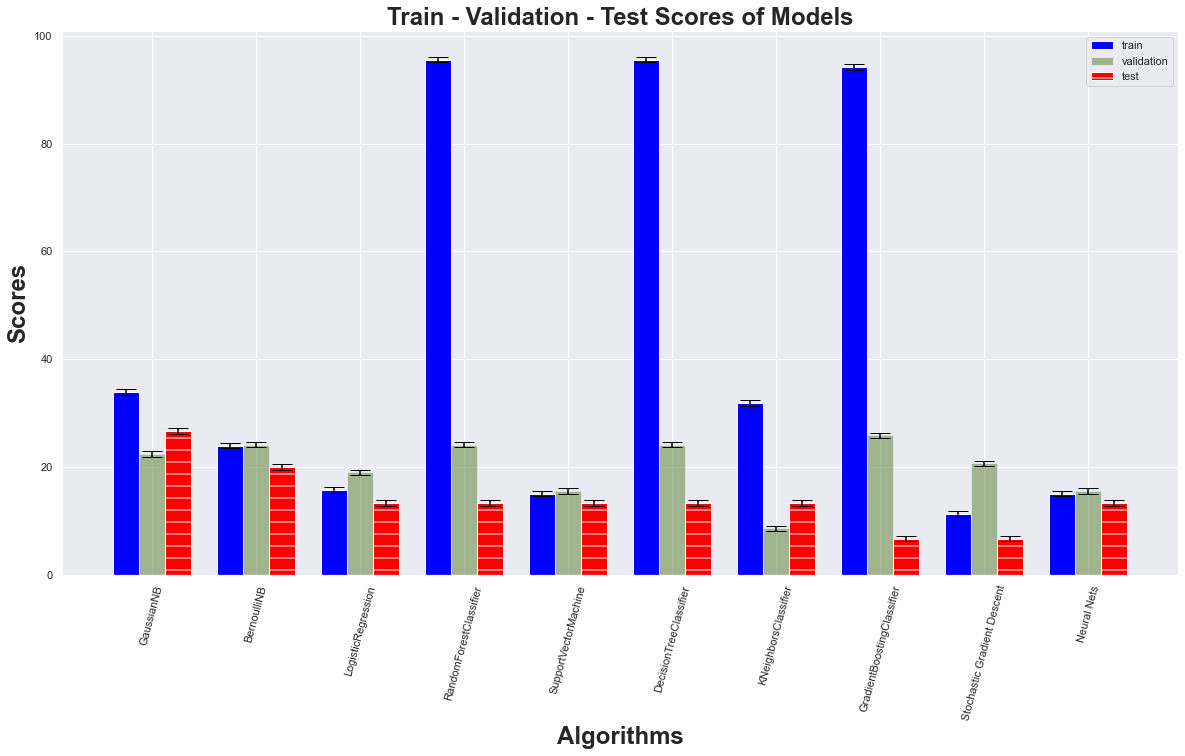

In [38]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB", 'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

You can measure variable importance in regression analysis, by fitting a regression model using the standardized independent variables and comparing the absolute value of their standardized coefficients. But, if the independent variables are not standardized, comparing their coefficients becomes meaningless.

In [39]:
for i in range(10):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 26.666666666666668
Accuracy of BernoulliNB -----> 20.0
Accuracy of LogisticRegression -----> 13.333333333333334
Accuracy of RandomForestClassifier -----> 13.333333333333334
Accuracy of SupportVectorMachine -----> 13.333333333333334
Accuracy of DecisionTreeClassifier -----> 13.333333333333334
Accuracy of KNeighborsClassifier -----> 13.333333333333334
Accuracy of GradientBoostingClassifier -----> 6.666666666666667
Accuracy of Stochastic Gradient Descent -----> 6.666666666666667
Accuracy of Neural Nets -----> 13.333333333333334


# Random Forest Model

In [40]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [41]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2


In [48]:
og = transaction.iloc[:,1]
y_pred = clf.predict(X)

In [49]:
for i in range(365):
    print(y_pred[i],'===>',og[i])

46 ===> 46
70 ===> 70
62 ===> 62
88 ===> 88
104 ===> 104
106 ===> 100
76 ===> 70
76 ===> 70
106 ===> 106
108 ===> 108
104 ===> 104
102 ===> 102
100 ===> 100
74 ===> 74
60 ===> 60
106 ===> 104
106 ===> 106
108 ===> 108
100 ===> 100
100 ===> 100
74 ===> 70
74 ===> 74
108 ===> 108
100 ===> 100
100 ===> 100
106 ===> 106
90 ===> 86
62 ===> 62
70 ===> 70
106 ===> 106
84 ===> 84
90 ===> 90
64 ===> 64
62 ===> 62
42 ===> 42
38 ===> 38
56 ===> 56
56 ===> 56
60 ===> 60
88 ===> 88
92 ===> 90
76 ===> 76
72 ===> 72
90 ===> 90
82 ===> 82
86 ===> 86
86 ===> 86
84 ===> 84
62 ===> 62
60 ===> 60
88 ===> 88
90 ===> 90
90 ===> 90
90 ===> 88
90 ===> 82
66 ===> 62
62 ===> 60
82 ===> 82
86 ===> 86
90 ===> 84
90 ===> 86
64 ===> 64
62 ===> 62
88 ===> 88
86 ===> 86
86 ===> 84
86 ===> 86
90 ===> 90
60 ===> 56
62 ===> 64
84 ===> 84
88 ===> 88
84 ===> 84
86 ===> 86
86 ===> 88
56 ===> 56
66 ===> 60
88 ===> 88
88 ===> 84
90 ===> 90
90 ===> 90
90 ===> 90
56 ===> 56
62 ===> 62
90 ===> 90
90 ===> 90
88 ===> 88
86 ===> 8

In [50]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

train_score = clf.score(X_train, y_train)
print(f'Train score of trained model: {train_score}')

# validation_score = clf.score(X_valid, y_valid)
# print(f'Validation score of trained model: {validation_score}')

test_score = clf.score(X_test, y_test)
print(f'Test score of trained model: {test_score}')

y_predictions = clf.predict(X_test)

conf_matrix = confusion_matrix(y_predictions, y_test)


print(f'Accuracy: {accuracy_score(y_predictions, y_test)*100}')
print()
print(f'Confussion matrix: \n{conf_matrix}\n')

Train score of trained model: 0.9554794520547946
Test score of trained model: 0.2
Accuracy: 20.0

Confussion matrix: 
[[1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 2 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 1 0 0 1 1 0]]



# Feature Importance

In [51]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp*100

DATE                   44.479914
AVERAGE_TEMPERATURE    43.845826
IS_WEEKEND              7.948038
HOLIDAY                 3.726222
YEAR                    0.000000
dtype: float64